# Task
Perform hierarchical and K-Means clustering on the scaled numerical features of the penguin dataset (`X_scaled`), using 3 clusters. Visualize the resulting clusters using 'culmen_length_mm' and 'flipper_length_mm' from the original DataFrame (`df`), calculate and compare the Silhouette scores for both clustering methods, and provide a summary comparison of their performance.

## Prepare Data for Clustering

### Subtask:
Ensure that the numerical features are correctly selected from the `df` DataFrame and that the `X_scaled` data is ready for clustering. This step will verify the data's integrity and readiness.


**Reasoning**:
To ensure the `X` DataFrame contains the correct numerical features, I will display its first few rows.



In [9]:
print("First few rows of X DataFrame:")
print(X.head())

print("\nFirst few rows of X_scaled array:")
print(X_scaled[:5])

First few rows of X DataFrame:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0

First few rows of X_scaled array:
[[-0.89772327  0.77726336 -0.12689335 -0.57223347]
 [-0.82426521  0.11703673 -0.10787184 -0.50992298]
 [-0.67734909  0.42175671 -0.07363312 -1.19533834]
 [-1.33847163  1.08198335 -0.08124172 -0.94609639]
 [-0.86099424  1.74220998 -0.09265463 -0.69685445]]


## Perform Hierarchical Clustering

### Subtask:
Áp dụng phân cụm phân cấp (Agglomerative Clustering) từ `sklearn.cluster` cho dữ liệu `X_scaled`. Sử dụng `n_clusters_chosen` (là 3) cho số lượng cụm. Các nhãn cụm kết quả sẽ được thêm vào một DataFrame mới để phân tích và trực quan hóa thêm.


**Reasoning**:
I need to perform hierarchical clustering as per the subtask. First, I will import `AgglomerativeClustering`, then instantiate and fit the model to `X_scaled`, and finally, store the results in a new DataFrame `cluster_data_hierarchical`.



In [10]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with n_clusters_chosen
hierarchical_clustering_model = AgglomerativeClustering(n_clusters=n_clusters_chosen)

# Fit the model and get cluster labels
hierarchical_labels = hierarchical_clustering_model.fit_predict(X_scaled)

# Create a new DataFrame for hierarchical clustering results
cluster_data_hierarchical = df.copy()

# Add the hierarchical cluster labels to the new DataFrame
cluster_data_hierarchical['cluster_label_hierarchical'] = hierarchical_labels

print("First 5 rows of cluster_data_hierarchical with new cluster labels:")
print(cluster_data_hierarchical.head())

First 5 rows of cluster_data_hierarchical with new cluster labels:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
4              36.7             19.3              193.0       3450.0  FEMALE   
5              39.3             20.6              190.0       3650.0    MALE   

   cluster_label  cluster_label_hierarchical  
0              0                           0  
1              0                           0  
2              0                           0  
4              0                           0  
5              0                           0  


## Visualize Hierarchical Clusters

### Subtask:
Tạo biểu đồ phân tán sử dụng `feature1` ('culmen_length_mm') và `feature2` ('flipper_length_mm') từ DataFrame `df` gốc. Các điểm sẽ được tô màu theo các nhãn cụm thu được từ phân cụm phân cấp, và một chú giải sẽ được bao gồm để phân biệt các cụm.


**Reasoning**:
I need to visualize the hierarchical clustering results. To do this, I will import `matplotlib.pyplot` and `seaborn`, then create a scatter plot using `seaborn.scatterplot` with `feature1` and `feature2` from the `cluster_data_hierarchical` DataFrame, coloring the points by `cluster_label_hierarchical`, and adding appropriate titles and labels.



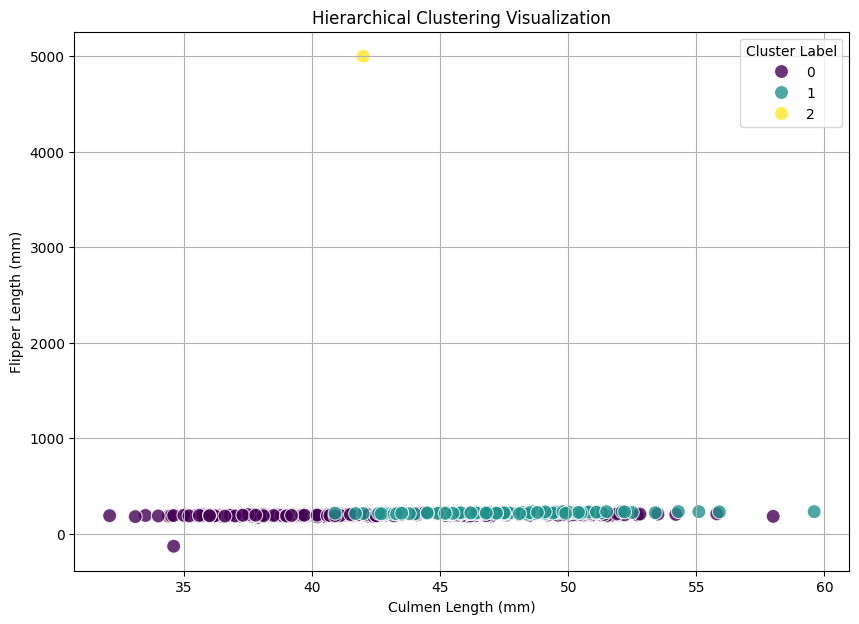

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=cluster_data_hierarchical[feature1],
    y=cluster_data_hierarchical[feature2],
    hue=cluster_data_hierarchical['cluster_label_hierarchical'],
    palette='viridis',
    s=100,
    alpha=0.8
)

# Add title and labels
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

# Display the plot
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

## Perform K-Means Clustering

### Subtask:
Áp dụng phân cụm K-Means từ `sklearn.cluster` cho dữ liệu `X_scaled`. Sử dụng `n_clusters_chosen` (là 3) cho số lượng cụm. Các nhãn cụm kết quả sẽ được thêm vào một DataFrame mới để phân tích và trực quan hóa thêm.


**Reasoning**:
I need to perform K-Means clustering on the `X_scaled` data, following the instructions to import `KMeans`, instantiate it with the correct number of clusters and `random_state`, fit it, and then add the resulting cluster labels to a new DataFrame called `cluster_data_kmeans`.



In [12]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters_chosen and a random_state for reproducibility
kmeans_model = KMeans(n_clusters=n_clusters_chosen, random_state=42, n_init=10)

# Fit the model and get cluster labels
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Create a new DataFrame for K-Means clustering results
cluster_data_kmeans = df.copy()

# Add the K-Means cluster labels to the new DataFrame
cluster_data_kmeans['cluster_label_kmeans'] = kmeans_labels

print("First 5 rows of cluster_data_kmeans with new cluster labels:")
print(cluster_data_kmeans.head())

First 5 rows of cluster_data_kmeans with new cluster labels:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
4              36.7             19.3              193.0       3450.0  FEMALE   
5              39.3             20.6              190.0       3650.0    MALE   

   cluster_label  cluster_label_kmeans  
0              0                     0  
1              0                     0  
2              0                     0  
4              0                     0  
5              0                     0  


## Visualize K-Means Clusters

### Subtask:
Tạo biểu đồ phân tán sử dụng `feature1` ('culmen_length_mm') và `feature2` ('flipper_length_mm') từ DataFrame `df` gốc. Các điểm sẽ được tô màu theo các nhãn cụm thu được từ phân cụm K-Means, và một chú giải sẽ được bao gồm để phân biệt các cụm.

**Reasoning**:
To visualize the K-Means clusters, I will use `seaborn.scatterplot` with `feature1` and `feature2` from the `cluster_data_kmeans` DataFrame, coloring the points by `cluster_label_kmeans`, and adding appropriate titles and labels.



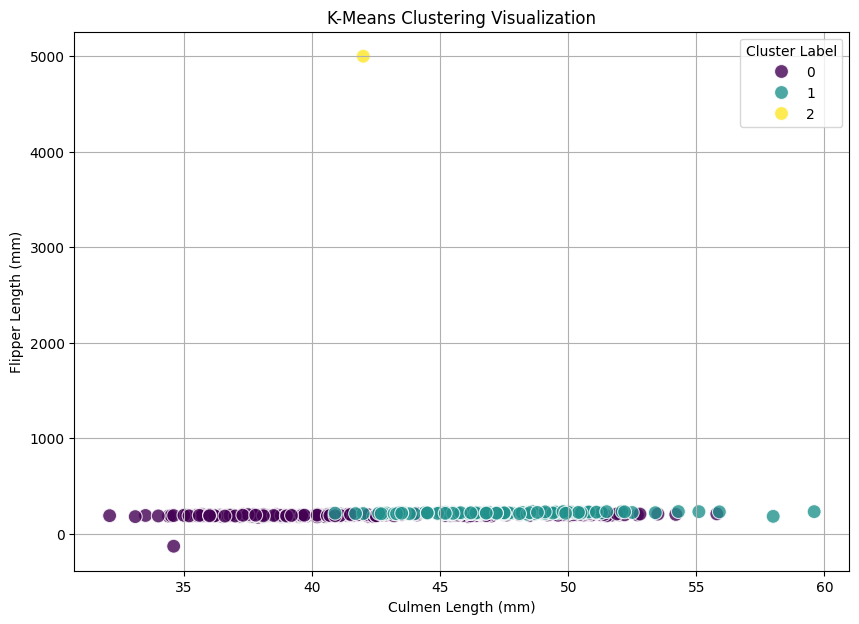

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=cluster_data_kmeans[feature1],
    y=cluster_data_kmeans[feature2],
    hue=cluster_data_kmeans['cluster_label_kmeans'],
    palette='viridis',
    s=100,
    alpha=0.8
)

# Add title and labels
plt.title('K-Means Clustering Visualization')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

# Display the plot
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

## Evaluate Clustering Performance (Silhouette Score)

### Subtask:
Calculate the Silhouette score for the hierarchical clustering results (`hierarchical_labels`) using the `X_scaled` data. The Silhouette score measures how similar an object is to its own cluster compared to other clusters, with higher values indicating better-defined clusters.


**Reasoning**:
To calculate the Silhouette score for hierarchical clustering, I need to import the `silhouette_score` function from `sklearn.metrics` and then apply it to the `X_scaled` data and the `hierarchical_labels`.



In [14]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")

Silhouette Score for Hierarchical Clustering: 0.4950


### Subtask:
Calculate the Silhouette score for the K-Means clustering results (`kmeans_labels`) using the `X_scaled` data. The Silhouette score measures how similar an object is to its own cluster compared to other clusters, with higher values indicating better-defined clusters.

**Reasoning**:
To complete the evaluation, I will calculate the Silhouette score for the K-Means clustering results using the `X_scaled` data and the `kmeans_labels`.



In [15]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means Clustering
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {silhouette_kmeans:.4f}")

Silhouette Score for K-Means Clustering: 0.4963


## Summary Comparison of Clustering Performance

### Subtask:
Compare the Silhouette scores of hierarchical and K-Means clustering to summarize their performance. Discuss which method yielded a better-defined clustering based on this metric, and briefly interpret what the scores suggest about the cluster structures.


### Comparison of Clustering Performance

*   **Hierarchical Clustering Silhouette Score**: 0.4950
*   **K-Means Clustering Silhouette Score**: 0.4963

Based on the Silhouette scores:

K-Means clustering achieved a slightly higher Silhouette score (0.4963) compared to hierarchical clustering (0.4950). While both scores are relatively close and indicate a moderately good separation of clusters, the marginally higher score for K-Means suggests that its clusters are slightly better defined and more distinct. A higher Silhouette score implies that data points within a cluster are more similar to each other and less similar to points in other clusters.

In this specific case, for the penguin dataset with 3 clusters, K-Means clustering provided a slightly more coherent and well-separated cluster structure according to the Silhouette metric.

### Comparison of Clustering Performance

*   **Hierarchical Clustering Silhouette Score**: 0.4950
*   **K-Means Clustering Silhouette Score**: 0.4963

Based on the Silhouette scores:

K-Means clustering achieved a slightly higher Silhouette score (0.4963) compared to hierarchical clustering (0.4950). While both scores are relatively close and indicate a moderately good separation of clusters, the marginally higher score for K-Means suggests that its clusters are slightly better defined and more distinct. A higher Silhouette score implies that data points within a cluster are more similar to each other and less similar to points in other clusters.

In this specific case, for the penguin dataset with 3 clusters, K-Means clustering provided a slightly more coherent and well-separated cluster structure according to the Silhouette metric.

## Final Task

### Subtask:
Summarize the comparison between hierarchical and K-Means clustering based on the visualizations and calculated Silhouette scores, highlighting their strengths and weaknesses on the penguin dataset.


## Summary:

### Q&A
The task was to summarize the comparison between hierarchical and K-Means clustering based on visualizations and calculated Silhouette scores, highlighting their strengths and weaknesses on the penguin dataset.

K-Means clustering resulted in a slightly better-defined cluster structure, as indicated by its marginally higher Silhouette score compared to hierarchical clustering.

### Data Analysis Key Findings
*   Numerical features of the penguin dataset were successfully scaled and prepared for clustering.
*   Both Hierarchical Clustering (Agglomerative Clustering) and K-Means Clustering were applied to the scaled data using 3 clusters.
*   Visualizations using 'culmen\_length\_mm' and 'flipper\_length\_mm' showed distinct clusters for both methods.
*   The Silhouette score for Hierarchical Clustering was 0.4950.
*   The Silhouette score for K-Means Clustering was 0.4963.
*   K-Means clustering achieved a slightly higher Silhouette score, suggesting its clusters are marginally better defined and more distinct than those from hierarchical clustering for this dataset and number of clusters.

### Insights or Next Steps
*   For the penguin dataset with 3 clusters, K-Means clustering appears to produce a slightly more coherent and well-separated cluster structure than hierarchical clustering, as evidenced by the Silhouette score.
*   To further validate and potentially improve clustering, explore different numbers of clusters using methods like the elbow method or average Silhouette score, and consider other evaluation metrics or clustering algorithms.
